In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [94]:
import datetime

In [82]:
df = pd.read_csv("healthpebbleraw.csv")

In [83]:
df.dtypes

Name                         object
Name@type                    object
PartitionKey                 object
RowKey                       object
Timestamp                    object
VMC                           int64
VMC@type                     object
activity_mask                 int64
activity_mask@type           object
heart_beat_bpm                int64
heart_beat_bpm@type          object
light                         int64
light@type                   object
measurement_time_UTC         object
measurement_time_UTC@type    object
pitch                         int64
pitch@type                   object
steps                         int64
steps@type                   object
timestamp                    object
timestamp@type               object
yaw                           int64
yaw@type                     object
dtype: object

In [84]:
df.head()

,Name,Name@type,PartitionKey,RowKey,Timestamp,VMC,VMC@type,activity_mask,activity_mask@type,heart_beat_bpm,...,measurement_time_UTC,measurement_time_UTC@type,pitch,pitch@type,steps,steps@type,timestamp,timestamp@type,yaw,yaw@type
0,Output binding message,Edm.String,healthpebbleraw,000205c7-94af-4700-8608-8280e8caa838,2020-04-21T15:23:49.796Z,6846,Edm.Int32,0,Edm.Int32,0,...,04/18/2020 10:19:00,Edm.String,5,Edm.Int32,5,Edm.Int32,2020-04-21 15:23:48.526759,Edm.String,3,Edm.Int32
1,Output binding message,Edm.String,healthpebbleraw,00056bff-07b7-4d95-ade0-005a0621a6b1,2020-04-18T05:08:48.264Z,6289,Edm.Int32,0,Edm.Int32,0,...,04/11/2020 16:35:00,Edm.String,4,Edm.Int32,29,Edm.Int32,2020-04-18 05:08:47.872431,Edm.String,2,Edm.Int32
2,Output binding message,Edm.String,healthpebbleraw,0008554c-a34e-40dc-9433-c4df5d31c322,2020-04-16T05:15:19.798Z,142,Edm.Int32,0,Edm.Int32,0,...,04/11/2020 15:33:00,Edm.String,7,Edm.Int32,0,Edm.Int32,2020-04-16 05:15:19.779121,Edm.String,6,Edm.Int32
3,Output binding message,Edm.String,healthpebbleraw,0008719d-90b9-46d4-ab7d-b0c430650b07,2020-04-20T15:31:21.001Z,2296,Edm.Int32,0,Edm.Int32,0,...,04/20/2020 07:20:00,Edm.String,6,Edm.Int32,0,Edm.Int32,2020-04-20 15:31:20.962146,Edm.String,3,Edm.Int32
4,Output binding message,Edm.String,healthpebbleraw,000b64f5-8cd4-4a08-b175-e7c6cbd829eb,2020-04-18T05:07:49.774Z,3230,Edm.Int32,0,Edm.Int32,75,...,04/11/2020 12:18:00,Edm.String,7,Edm.Int32,0,Edm.Int32,2020-04-18 05:07:49.381378,Edm.String,2,Edm.Int32


In [85]:
df_clean = df.drop(
    columns=list(
        set(["Timestamp", "timestamp", "Name", "Name@type", "PartitionKey", "RowKey"] 
            + [col for col in df.columns if "@" in col]
           )
    )
).copy()
print(df_clean.shape)

(46456, 8)


In [86]:
df_clean = df_clean.drop_duplicates()
df_clean.shape

(31903, 8)

In [87]:
df_clean.head()

,VMC,activity_mask,heart_beat_bpm,light,measurement_time_UTC,pitch,steps,yaw
0,6846,0,0,1,04/18/2020 10:19:00,5,5,3
1,6289,0,0,4,04/11/2020 16:35:00,4,29,2
2,142,0,0,1,04/11/2020 15:33:00,7,0,6
3,2296,0,0,1,04/20/2020 07:20:00,6,0,3
4,3230,0,75,1,04/11/2020 12:18:00,7,0,2


In [88]:
df_clean = df_clean.loc[df_clean.measurement_time_UTC.str.contains(":")].copy()
df_clean.shape

(31901, 8)

In [89]:
df_clean.measurement_time_UTC = pd.to_datetime(df_clean.measurement_time_UTC, utc=True)

In [90]:
df_clean = df_clean.sort_values(by="measurement_time_UTC").copy()

In [115]:
date_test = datetime.datetime.strptime("2020-05-01", "%Y-%m-%d").date()
df_test = df_clean.loc[df_clean.measurement_time_UTC.dt.date == date_test].copy()

In [120]:
df_test.heart_beat_bpm.sample(10)

41689     0
45367     0
4845      0
24648     0
11648    76
18402     0
38680     0
29180     0
34428     0
12286     0
Name: heart_beat_bpm, dtype: int64

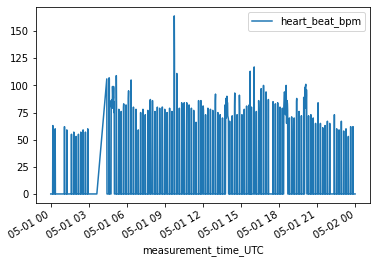

In [116]:
df_test.plot(x="measurement_time_UTC", y="heart_beat_bpm")

datetime.date(2020, 5, 1)